<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-5.2" data-toc-modified-id="Figure-5.2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 5.2</a></span></li></ul></div>

In [1]:
## Analyzing Neural Time Series Data
# Python code for Chapter 5
# Yujin Goto (MATLAB original code: Mike X Cohen)
# 
# This code accompanies the book, titled "Analyzing Neural Time Series Data" 
# (MIT Press). Using the code without following the book may lead to confusion, 
# incorrect data analyses, and misinterpretations of results. 
# Mike X Cohen and Yujin Goto assumes no responsibility for inappropriate or incorrect use of this code. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy.fft import fft, ifft

In [3]:
eeg_data = loadmat('./NeuralData/sampleEEGdata.mat')
data = eeg_data["EEG"][0,0]["data"]                 # EEG data (ndarray; ch, times, trial)
pnts = eeg_data["EEG"][0,0]["pnts"][0,0]            # Number of points in EEG data (scalar)
times = eeg_data["EEG"][0,0]["times"][0]            # Time points of data (ndarray)
srate = eeg_data["EEG"][0,0]["srate"][0]            # Sampling rate (ndarray)
trials = eeg_data["EEG"][0,0]["trials"][0,0]        # Trials (scalar)
nbchan = eeg_data["EEG"][0,0]["nbchan"][0,0]        # Number of channel (scalar)

chanlocslabels = eeg_data["EEG"][0,0]["chanlocs"][0]["labels"]

## Figure 5.2

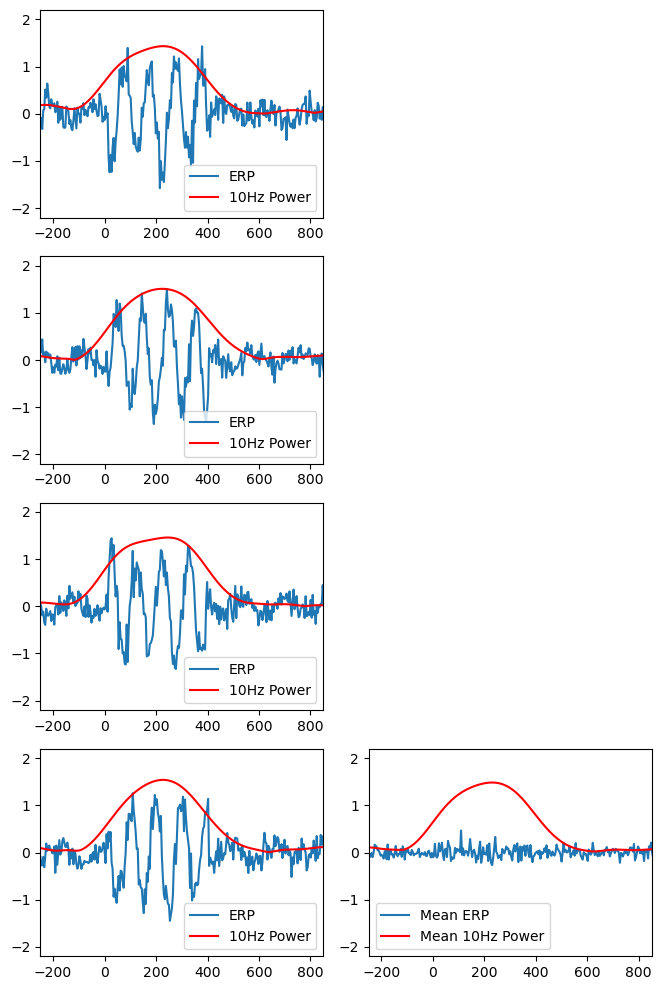

In [4]:
# Time-locked and non-phase-locked

nTrials = 4
data = np.zeros((nTrials, pnts))

# Wavelet parameters
wavetime = np.arange(-1, 1+1/srate, 1/srate)
n_conv = len(wavetime) + pnts - 1
waveletfft = fft(np.exp(2 * 1j * np.pi * 10 * wavetime) * np.exp(-wavetime ** 2 / (2 * (5 / (2 * np.pi * 10)) ** 2)) / 10, n_conv)
data10hz = np.zeros((nTrials, pnts))

plt.figure(figsize=(10,10))


for triali in range(nTrials):
    # Create single trial ERP as sine wave plus noise
    data[triali, :] = 0.15 * np.sin(2 * np.pi * 6 * times / 1000 + 2 * np.pi * triali / nTrials - np.pi) + np.random.randn(pnts) / 6
    # Add non-phase-locked stimulus potential
    data[triali, 260:360] += np.sin(2 * np.pi * 10 * times[260:360] / 1000 + 2 * np.pi * triali / nTrials - np.pi) + np.random.randn(100) / 5

    # Convolve with 10Hz wavelet
    convolution_result_fft = ifft(waveletfft * fft(data[triali, :], n_conv)) * np.sqrt(5 / (2 * np.pi * 10))
    half_of_wavelet_size = int(np.floor(len(wavetime) / 2))
    convolution_result_fft = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size]
    data10hz[triali, :] = np.abs(convolution_result_fft) * 2
    

    # Plot single trials
    plt.subplot(nTrials, 3, triali * 3 + 1)
    plt.plot(times, data[triali, :], label='ERP')
    plt.plot(times, data10hz[triali, :], 'r', label='10Hz Power')
    plt.xlim([-250, 850])
    plt.ylim([-2.2, 2.2])
    plt.legend()

# Plot mean over trials
plt.subplot(nTrials, 3, nTrials * 3 - 1)
plt.plot(times, np.mean(data, axis=0), label='Mean ERP')
plt.plot(times, np.mean(data10hz, axis=0), 'r', label='Mean 10Hz Power')
plt.xlim([-250, 850])
plt.ylim([-2.2, 2.2])
plt.legend()

plt.tight_layout()
plt.show()

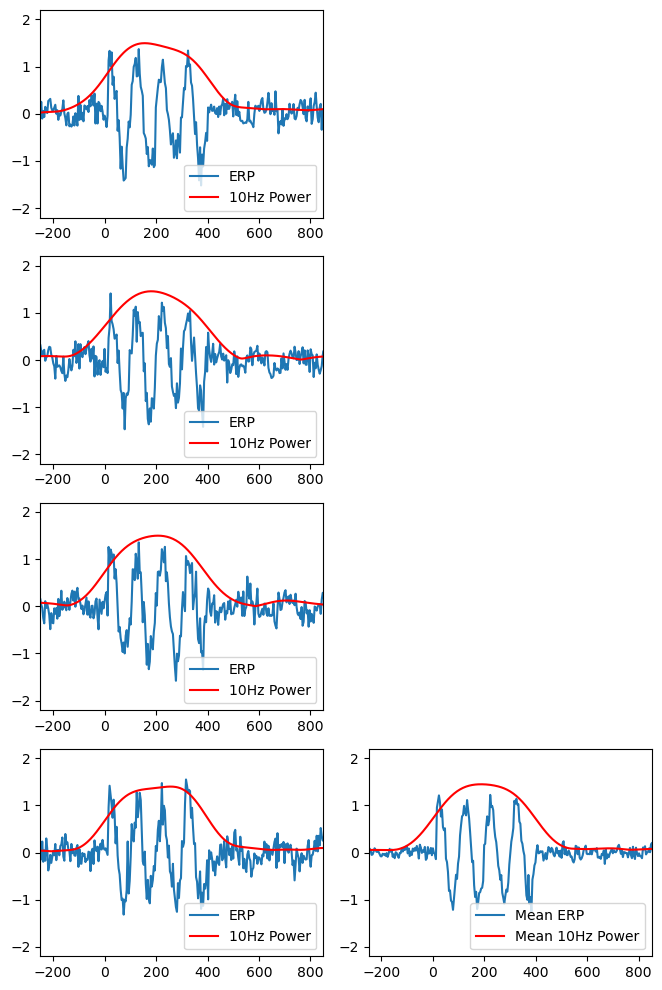

In [5]:
# Time-locked and non-phase-locked


nTrials = 4
data = np.zeros((nTrials, pnts))

# Wavelet parameters
wavetime = np.arange(-1, 1+1/srate, 1/srate)
n_conv = len(wavetime) + pnts - 1
waveletfft = fft(np.exp(2 * 1j * np.pi * 10 * wavetime) * np.exp(-wavetime ** 2 / (2 * (5 / (2 * np.pi * 10)) ** 2)) / 10, n_conv)
data10hz = np.zeros((nTrials, pnts))

plt.figure(figsize=(10,10))

for triali in range(nTrials):
    # Create single trial ERP as sine wave plus noise
    data[triali, :] = 0.15 * np.sin(2 * np.pi * 6 * times / 1000 + 2 * np.pi * triali / nTrials - np.pi) + np.random.randn(pnts) / 6
    # Add non-phase-locked stimulus potential
    data[triali, 260:360] += np.sin(2 * np.pi * 10 * times[260:360] / 1000) + np.random.randn(100) / 5

    # Convolve with 10Hz wavelet
    convolution_result_fft = ifft(waveletfft * fft(data[triali, :], n_conv)) * np.sqrt(5 / (2 * np.pi * 10))
    half_of_wavelet_size = int(np.floor(len(wavetime) / 2))
    convolution_result_fft = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size]
    data10hz[triali, :] = np.abs(convolution_result_fft) * 2
    

    # Plot single trials
    plt.subplot(nTrials, 3, triali * 3 + 1)
    plt.plot(times, data[triali, :], label='ERP')
    plt.plot(times, data10hz[triali, :], 'r', label='10Hz Power')
    plt.xlim([-250, 850])
    plt.ylim([-2.2, 2.2])
    plt.legend()

# Plot mean over trials
plt.subplot(nTrials, 3, nTrials * 3 - 1)
plt.plot(times, np.mean(data, axis=0), label='Mean ERP')
plt.plot(times, np.mean(data10hz, axis=0), 'r', label='Mean 10Hz Power')
plt.xlim([-250, 850])
plt.ylim([-2.2, 2.2])
plt.legend()

plt.tight_layout()
plt.show()

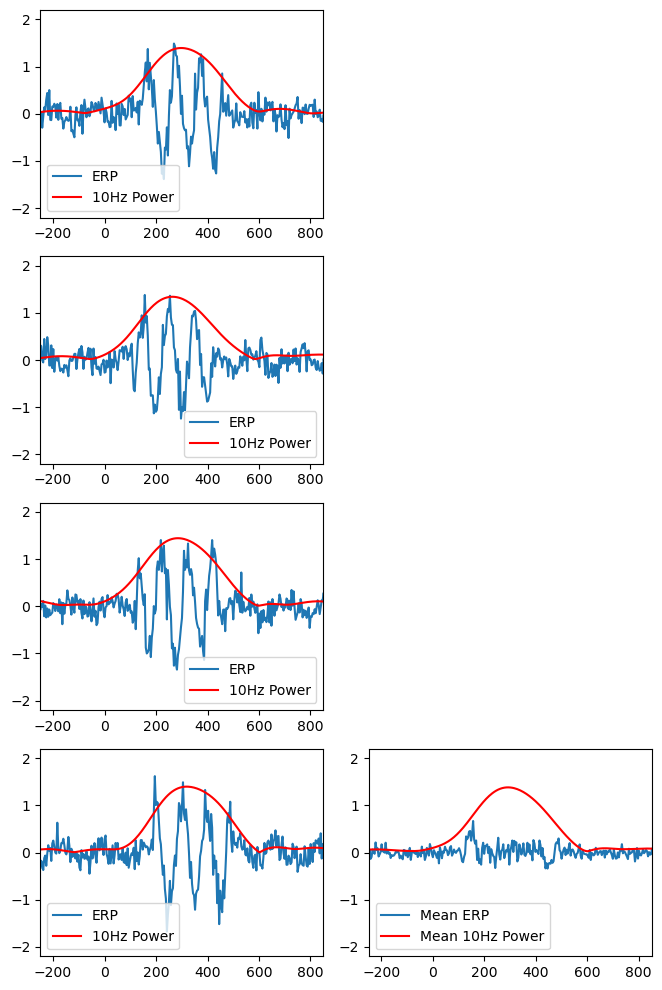

In [6]:
# Non-time-locked and phase-locked

nTrials = 4
data = np.zeros((nTrials, pnts))

# Wavelet parameters
wavetime = np.arange(-1, 1+1/srate, 1/srate)
n_conv = len(wavetime) + pnts - 1
waveletfft = fft(np.exp(2 * 1j * np.pi * 10 * wavetime) * np.exp(-wavetime ** 2 / (2 * (5 / (2 * np.pi * 10)) ** 2)) / 10, n_conv)
data10hz = np.zeros((nTrials, pnts))

plt.figure(figsize=(10,10))

for triali in range(nTrials):
    # Create single trial ERP as sine wave plus noise
    data[triali, :] = 0.15 * np.sin(2 * np.pi * 6 * times / 1000 + 2 * np.pi * triali / nTrials - np.pi) + np.random.randn(pnts) / 6
    
    # add non-phase-locked stimulus potential
    eventtime_start = np.random.randint(240, 320)
    eventtime = np.arange(eventtime_start, eventtime_start + 80)
    
    # Add non-phase-locked stimulus potential
    data[triali, eventtime] += np.sin(2 * np.pi * 10 * times[eventtime] / 1000 + 2*np.pi*triali/nTrials-np.pi) + np.random.randn(len(eventtime))/5

    # Convolve with 10Hz wavelet
    convolution_result_fft = ifft(waveletfft * fft(data[triali, :], n_conv)) * np.sqrt(5 / (2 * np.pi * 10))
    half_of_wavelet_size = int(np.floor(len(wavetime) / 2))
    convolution_result_fft = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size]
    data10hz[triali, :] = np.abs(convolution_result_fft) * 2
    

    # Plot single trials
    plt.subplot(nTrials, 3, triali * 3 + 1)
    plt.plot(times, data[triali, :], label='ERP')
    plt.plot(times, data10hz[triali, :], 'r', label='10Hz Power')
    plt.xlim([-250, 850])
    plt.ylim([-2.2, 2.2])
    plt.legend()

# Plot mean over trials
plt.subplot(nTrials, 3, nTrials * 3 - 1)
plt.plot(times, np.mean(data, axis=0), label='Mean ERP')
plt.plot(times, np.mean(data10hz, axis=0), 'r', label='Mean 10Hz Power')
plt.xlim([-250, 850])
plt.ylim([-2.2, 2.2])
plt.legend()

plt.tight_layout()
plt.show()